
# Fourier Filter Example
This script illustrates the following concepts:

- Usage of geocat-comp's fourier_filter function
- Usage of geocat-datafiles for accessing NetCDF files

For more information on the `fourier_filter function` visit this [GitHub repository](https://github.com/NCAR/geocat-comp).

## Import packages

Dependencies:
 - geocat.comp
 - [geocat.datafiles](https://github.com/NCAR/geocat-datafiles) (for accessing data file conveniently)
 - [numpy](https://numpy.org/)
 - [pandas](https://pandas.pydata.org/)
 - [matplotlib](https://matplotlib.org/) (installed with geocat.viz)
 - [xarray](https://docs.xarray.dev/en/stable/) (installed with geocat.comp)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import geocat.datafiles as gdf
from geocat.comp import fourier_filter

## Read in data

Open a netCDF data file using xarray default engine and load the data into xarrays. In this example we're using the [`CO-OPS_9415020_wl.csv` file](https://github.com/NCAR/geocat-datafiles/tree/main/ascii_files).

[SAY SOMETHING ABOUT THIS DATA - it's variables at least]

In [2]:
dataset = xr.DataArray(pd.read_csv(
    gdf.get("ascii_files/CO-OPS_9415020_wl.csv")))
xr_data = dataset.loc[:, 'Verified (ft)']

## Calculate something

We will calculate the fourier transform of our data using four different filters.

There is a low and high cut off frequency for 2 different tide frequencies. What is the difference between them? Can you give them a better name?

In [3]:
# Set points per hour
data_freq = 10

# Set tide cycle and frequency resolution
tide_freq1 = 1 / (1 * 12.4206)
tide_freq2 = 1 / (2 * 12.4206)
res = data_freq / (len(xr_data))

# Define cutoff_frequency_low and cutoff_frequency_high based on tide frequency
cflow1 = tide_freq1 - res * 5
cfhigh1 = tide_freq1 + res * 5
cflow2 = tide_freq2 - res * 5
cfhigh2 = tide_freq2 + res * 5

In [4]:
no_tide = xr_data

no_tide_filter1 = fourier_filter(no_tide,
                         data_freq,
                         cutoff_frequency_low=cflow1,
                         cutoff_frequency_high=cfhigh1,
                         band_block=True)

no_tide_filter2 = fourier_filter(no_tide,
                         data_freq,
                         cutoff_frequency_low=cflow2,
                         cutoff_frequency_high=cfhigh2,
                         band_block=True)

## Plot

Any explanatory text on the figures.

[THEY ALSO NEED BETTER TITLES]

/var/folders/sn/zbcchctj11g3lyc9xqm5r9br0000gs/T/ipykernel_81004/2467687222.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sn/zbcchctj11g3lyc9xqm5r9br0000gs/T/ipykernel_81004/2467687222.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sn/zbcchctj11g3lyc9xqm5r9br0000gs/T/ipykernel_81004/2467687222.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


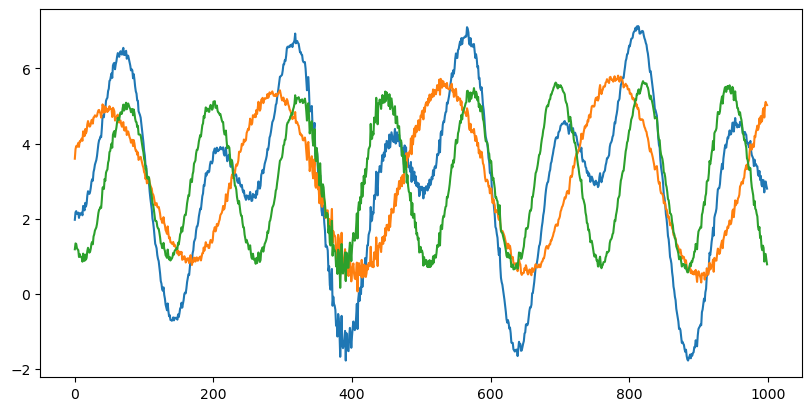

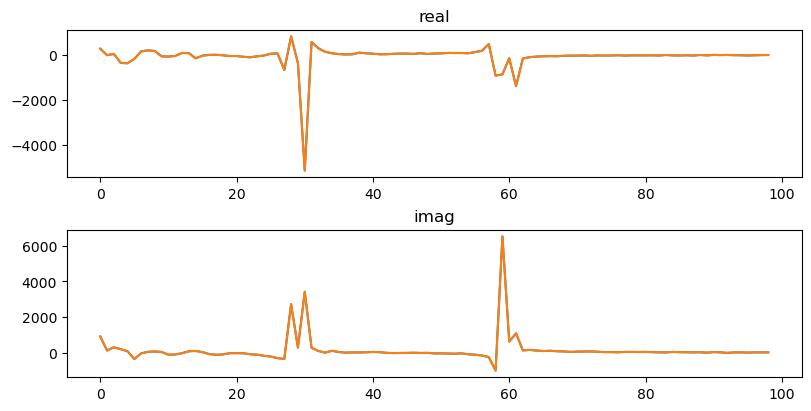

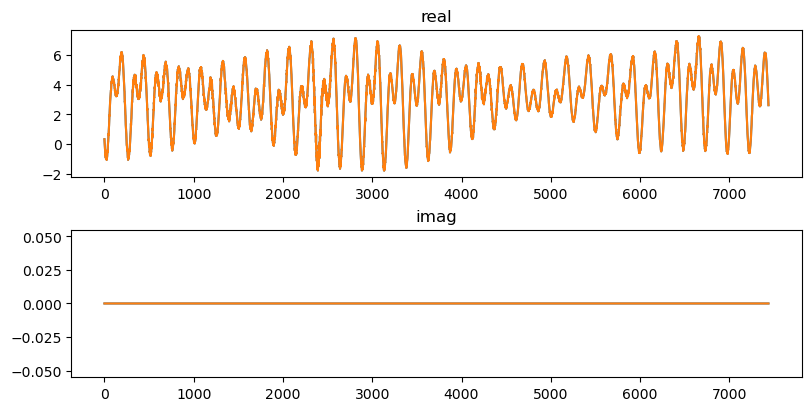

In [5]:
# Generate figure with 1 subplot and set its size (width, height) in inches
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

# Load signal data and plot it
ax.plot(no_tide[2000:3000])

# Plot filtered signal data using fourier_filter for the first set of cutoffs
ax.plot(no_tide_filter1[2000:3000])

# Plot filtered signal data using fourier_filter for the second set of cutoffs
ax.plot(no_tide_filter2[2000:3000])

# Show figure
fig.show()

# Generate figure with 2 by 1 subplots and set its size (width, height) in inches
fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

# Plot the real set of data utilizing NumPy's Fourier Transform function using both
# the original data and the fourier_filter applied to the second set of cutoffs
axs[0].set_title('real')
axs[0].plot(np.real(np.fft.fft(xr_data)[1:100]))
axs[0].plot(np.real(np.fft.fft(no_tide)[1:100]))

# Plot the imaginary set of data utilizing NumPy's Fourier Transform function using both
# the original data and the fourier_filter applied to the second set of cutoffs
axs[1].set_title('imag')
axs[1].plot(np.imag(np.fft.fft(xr_data)[1:100]))
axs[1].plot(np.imag(np.fft.fft(no_tide)[1:100]))

# Show figure
fig.show()

# Generate figure with 2 by 1 subplots and set its size (width, height) in inches
fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

# Define start and end of data indices
start = 0
end = -1

# Plot the real and imaginary sets of data from the original and filtered data
axs[0].set_title('real')
axs[0].plot(np.real(xr_data)[start:end])
axs[0].plot(np.real(no_tide)[start:end])
axs[1].set_title('imag')
axs[1].plot(np.imag(xr_data)[start:end])
axs[1].plot(np.imag(no_tide)[start:end])

# Show plot
fig.show()